In [1]:
import qiskit
import numpy as np
import qtm.constant, qtm.nqubit, qtm.fubini_study
import importlib
importlib.reload(qtm.fubini_study)
importlib.reload(qtm.nqubit)

<module 'qtm.nqubit' from 'c:\\Users\\haime\\OneDrive\\Máy tính\\QuantumTomography\\codes\\qtm\\nqubit.py'>

In [36]:
# Init parameters
num_qubits = 8
num_layers = 2
thetas = np.ones(num_layers*(2*num_qubits))
theta = np.pi / 2
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)

loss_values = []
thetass = []
for i in range(0, 100):
    if i % 20 == 0:
        print(i)
    G = qtm.fubini_study.qng(qc.copy(), thetas, qtm.nqubit.create_polygongraph_state, num_layers)
    grad_loss = qtm.base.grad_loss(
        qc, 
        qtm.nqubit.create_GHZchecker_polygongraph,
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers, theta = theta)
    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss)) 
    qc_copy = qtm.nqubit.create_GHZchecker_polygongraph(qc.copy(), thetas, num_layers, theta)  
    loss = qtm.base.loss_fubini_study(qtm.base.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values.append(loss)
    thetass.append(thetas)

0
20
40
60
80


In [37]:
np.savetxt("../experiments/polygon_ansatz_ghz/" + str(num_qubits) + "/loss_values_qng.csv", loss_values, delimiter=",")
np.savetxt("../experiments/polygon_ansatz_ghz/" + str(num_qubits) + "/thetass_qng.csv", thetass, delimiter=",")

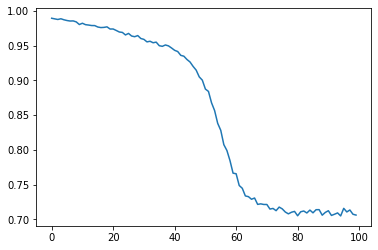

In [38]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

In [39]:
traces = []
fidelities = []
i = 0
for thetas in thetass:

    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.nqubit.create_polygongraph_state(qc, thetas, num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.nqubit.create_ghz_state(qc1, theta = theta)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
np.savetxt("../experiments/polygon_ansatz_ghz/" + str(num_qubits) + "/traces_qng.csv", traces, delimiter=",")
np.savetxt("../experiments/polygon_ansatz_ghz/" + str(num_qubits) + "/fidelities_qng.csv", fidelities, delimiter=",")

### W preparation

In [2]:
# Init parameters
num_qubits = 10
num_layers = 2
thetas = np.ones(num_layers*(2*num_qubits))
theta = np.pi / 2
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)

loss_values = []
thetass = []
for i in range(0, 100):
    if i % 20 == 0:
        print(i)
    G = qtm.fubini_study.qng(qc.copy(), thetas, qtm.nqubit.create_polygongraph_state, num_layers)
    grad_loss = qtm.base.grad_loss(
        qc, 
        qtm.nqubit.create_Wchecker_polygongraph,
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers)
    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss)) 
    qc_copy = qtm.nqubit.create_Wchecker_polygongraph(qc.copy(), thetas, num_layers)  
    loss = qtm.base.loss_fubini_study(qtm.base.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values.append(loss)
    thetass.append(thetas)

0
20
40
60
80


In [3]:
np.savetxt("../experiments/polygon_ansatz_w/" + str(num_qubits) + "/loss_values_qng.csv", loss_values, delimiter=",")
np.savetxt("../experiments/polygon_ansatz_w/" + str(num_qubits) + "/thetass_qng.csv", thetass, delimiter=",")

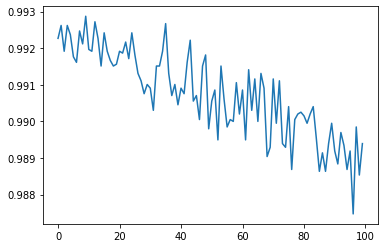

In [4]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

In [6]:
traces = []
fidelities = []
i = 0
for thetas in thetass:
    print(i)
    i += 1
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.nqubit.create_polygongraph_state(qc, thetas, num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.nqubit.create_w_state(qc1)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
np.savetxt("../experiments/polygon_ansatz_w/" + str(num_qubits) + "/traces_qng.csv", traces, delimiter=",")
np.savetxt("../experiments/polygon_ansatz_w/" + str(num_qubits) + "/fidelities_qng.csv", fidelities, delimiter=",")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
